## Calcular el Factorial de un número

Crear una función en R que calcule el factorial de un número. Se puede hacer recursivo o iterativo.

In [12]:
#recursiva 
myFactorialRecursivo<-function(X){
    x<-as.integer(X)
    if (X==0){
        return(1)
    }else{
        X*myFactorialRecursivo(X-1)
    }
}

#Iterativo
myFactorialIterativo<-function(X){
    f<-1
    X<-as.integer(X)
    if (X<=1){
        return(1)
    }else{
        for(i in 1:X){
            f<-i*f
        }
    }
    f
}


In [13]:
myFactorialRecursivo(4)
myFactorialIterativo(4)
factorial(4)

[1] 24

[1] 24

[1] 24

## Percentiles

Hacer una función que calcule el percentil de un vector. Recibirá dos parámetros, el vector y el percentil que queremos ver, sino se indica el percentil se supondrá que es el 50%.

In [19]:
calcPercentile<-function(x,p=50){
    p<-p/100
    x<-sort(na.omit(x))
    
    idx = 1+(length(x)-1)*p
    
    err<-ceiling(idx)-idx
 
    xl<-x[floor(idx)]
    xh<-x[ceiling(idx)]
    
    xl*err+xh*(1-err)    
}

In [ ]:
10 20 30 40

In [16]:
idx<-2.5
floor(idx)
ceiling(idx)


[1] 2

[1] 3

In [22]:
x <- runif(100, min=0, max=10)
calcPercentile(x)
median(x)

[1] 5.247553

[1] 5.247553

In [23]:
calcPercentile(x,92)
quantile(x,0.92)

[1] 9.450086

92% 
9.450086

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [25]:
poblacion<-read.csv("data/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F)
poblacion$V5<-NULL
colnames(poblacion)<-c("edadTxt","Total","Hombres","Mujeres")
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104

In [32]:
poblacion <- poblacion[1:105,]
#poblacion$edad <- 0:104
poblacion$edad <- as.integer(gsub("año(|s)","",poblacion$edadTxt))
tail(poblacion)

,edadTxt,Total,Hombres,Mujeres,edad
,<fct>,<dbl>,<dbl>,<dbl>,<int>
100,99 años,7894,1773,6121,99
101,100 años,5381,1204,4177,100
102,101 años,3266,675,2591,101
103,102 años,1762,285,1477,102
104,103 años,1103,169,935,103
105,104 años,638,97,542,104


In [39]:
paste("La moda está en",poblacion[which.max(poblacion$Total),"edadTxt"])
paste("La moda está en",poblacion$edadTxt[which.max(poblacion$Total)])

[1] "La moda está en     41 años"

[1] "La moda está en     41 años"

In [42]:
paste("La edad media es",round(sum(poblacion$edad*poblacion$Total)/sum(poblacion$Total),1))

[1] "La edad media es 42.6"

In [45]:
paste("La edad media es",mean(rep(poblacion$edad,poblacion$Total)))

[1] "La edad media es 42.586387378654"

In [46]:
paste("La edad mediana es",median(rep(poblacion$edad,poblacion$Total)))

[1] "La edad mediana es 43"

In [52]:
rep(c(1,2,3,4),c(10,1,2,5))

[1] 1 1 1 1 1 1 1 1 1 1 2 3 3 4 4 4 4 4

In [50]:
cumsum(c(1,2,3,4))

[1]  1  3  6 10

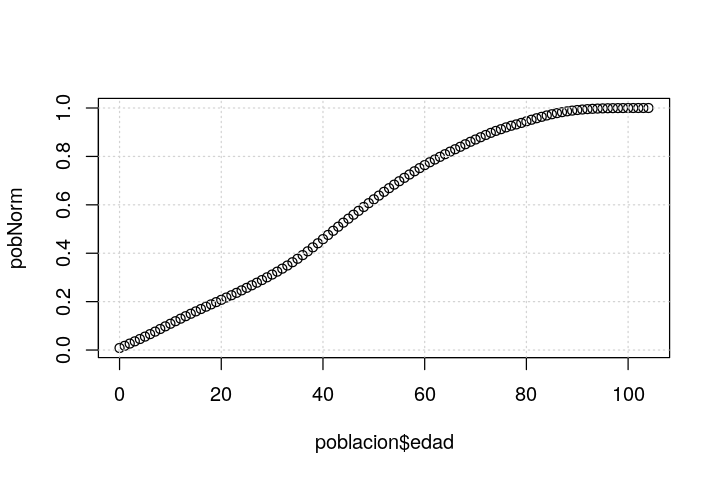

In [56]:
options(repr.plot.height=4,repr.plot.width=6)

pobNorm<-cumsum(poblacion$Total)/sum(poblacion$Total)
plot(poblacion$edad,pobNorm)
grid()

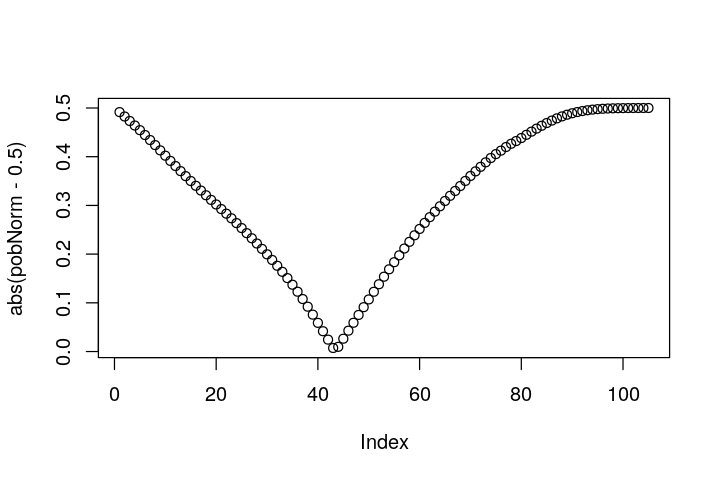

In [60]:
plot(abs(pobNorm-0.5))

In [65]:
paste("La edad mediana es", poblacion$edad[which.min(abs(pobNorm-0.5))])

[1] "La edad mediana es 42"

## Peso al nacer

Leer el dataset que se encuentra en tests/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
Calcular cuantiles, media, desigualdad Chebyshev para k=sqrt(2), y compararla con cuantiles. Boxplot.
Pinta su histograma y función de densidad.

In [66]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight

In [67]:
quantile(weight,c(0.25,0.5,0.75))

25%  50%  75% 
6.45 7.25 8.00

In [77]:
k=sqrt(2)
lim_inf<-mean(weight)-k*sd(weight)
lim_sup<-mean(weight)+k*sd(weight)
paste("Como máximo el ",1/k^2, " de las muestras estaran fuera del intervalo [",
      lim_inf,",",lim_sup,"]")

[1] "Como máximo el  0.5  de las muestras estaran fuera del intervalo [ 5.38375091008086 , 9.14482051849057 ]"

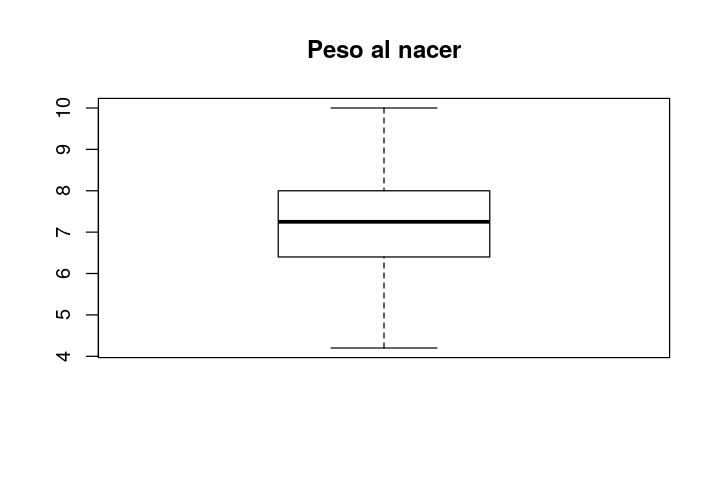

In [72]:
boxplot(weight,main="Peso al nacer")

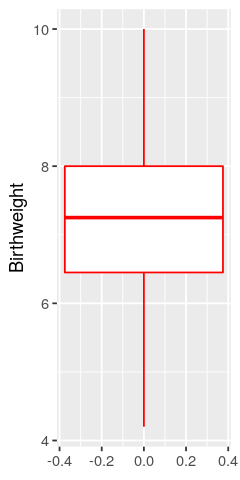

In [76]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=2)

ggplot(bwt,aes(y=Birthweight))+geom_boxplot(color="red")

In [79]:
sort(bwt$Birthweight)

[1]  4.2  4.5  5.2  5.5  5.8  5.8  6.0  6.0  6.1  6.3  6.4  6.6  6.6  6.8  6.9
[16]  6.9  7.0  7.0  7.0  7.1  7.2  7.3  7.3  7.3  7.5  7.5  7.7  7.8  7.9  8.0
[31]  8.0  8.0  8.3  8.5  8.5  8.6  8.6  8.9  9.0  9.5 10.0 10.0

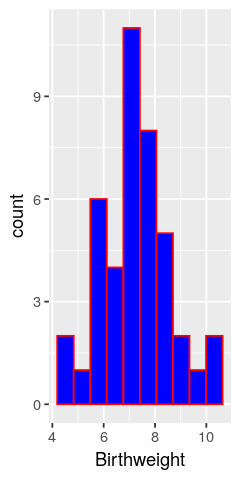

In [83]:
ggplot(bwt,aes(x=Birthweight))+geom_histogram(bins=10,color="red",fill="blue")

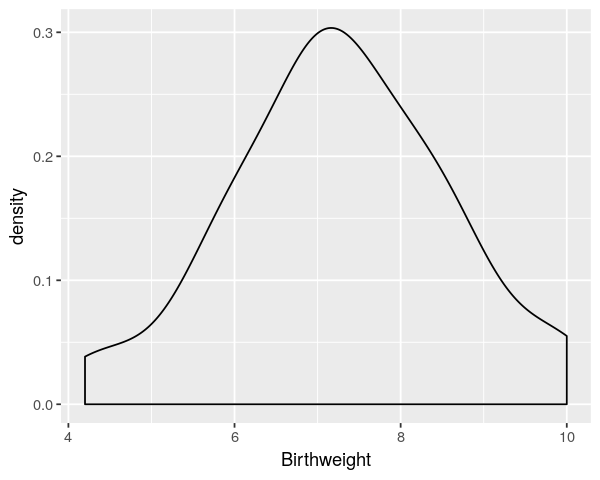

In [106]:
ggplot(bwt,aes(x=Birthweight))+geom_density(bw=0.5)

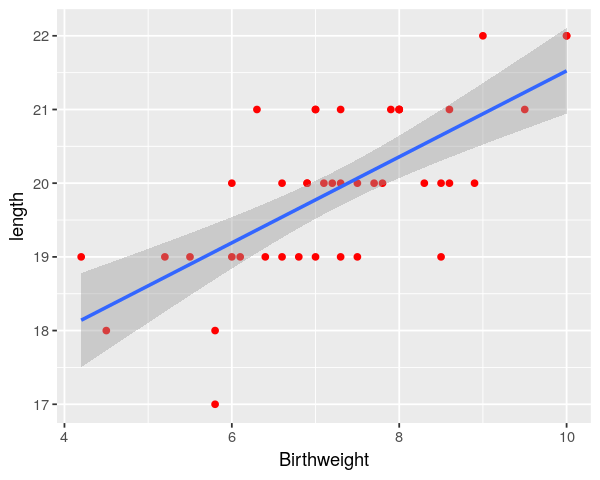

In [88]:
options(repr.plot.height=4,repr.plot.width=5)

ggplot(bwt,aes(x=Birthweight,y=length))+geom_point(color="red")+geom_smooth(method="lm")